# LinearRegression and SoftmaxRegression model training
- Straight forward model training (closed-form solution)
- Using Gradient Descent algorithm to find the best fit line (Batch, Stochastic, Mini-batch)

In [5]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures


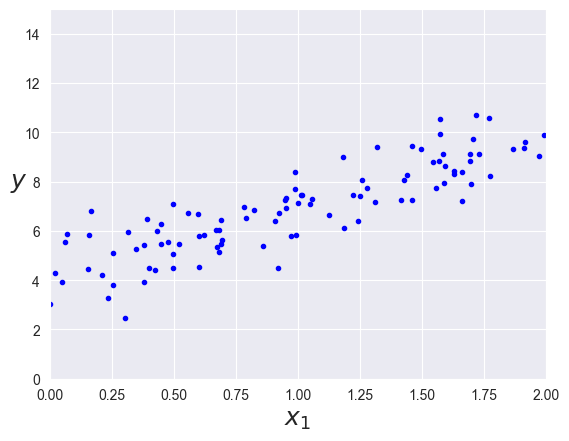

In [2]:
# Normal solution
X = 2 * np.random.rand(100, 1) # 100 samples, 1 feature
y = 4 + 3 * X + np.random.randn(100, 1) # y = 4 + 3X + noise

# plot the data
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis((0, 2, 0, 15))
plt.show()

In [ ]:
# Normal equation
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # normal equation
print(X_b[:5])
print(theta_best) # Try to reproduce y = 4 + 3

In [ ]:
# Make predictions
X_new = np.array([[0], [2]]) # 2 new instances
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance 
y_predict = X_new_b.dot(theta_best)

print(y_predict)

In [ ]:
# Plot the model prediction
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis((0, 2, 0, 15))
plt.show()

In [ ]:
# Using Scikit-Learn to do the same thing
lin_reg = LinearRegression() # this model based on Normal Equation (scipy.linalg.lstsq())
lin_reg.fit(X, y)

intercept, slope = lin_reg.intercept_, lin_reg.coef_
print(intercept, slope)

# plot the model prediction
y_predict = lin_reg.predict(X_new)
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis((0, 2, 0, 15))
plt.show()

In [ ]:
# Using last square method to find the best fit line
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print(theta_best_svd)

result = np.linalg.pinv(X_b).dot(y) # Moore-Penrose pseudo-inverse
print(result)

In [ ]:
# Gradient Descent Explanation

# main parameter in Gradient Descent is learning rate, if it's too small, the algorithm will take long time to converge, if too big it may not converge

In [ ]:
# Batch Gradient Descent example

eta = 0.1                                           # learning rate
n_iterations = 1000                                 # number of iterations
m = 100                                             # number of samples

theta = np.random.randn(2, 1)                       # random initialization

for iteration in range(n_iterations):               # loop through n_iterations
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # gradient of the cost function
    theta = theta - eta * gradients                 # update theta

print(theta)

In [ ]:
# Change the learning rate to see the effect
eta = 0.2                                           # learning rate
n_iterations = 100                                  # number of iterations
m = 100                                             # number of samples

theta = np.random.randn(2, 1)                       # random initialization

for iteration in range(n_iterations):               # loop through n_iterations
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # gradient of the cost function
    theta = theta - eta * gradients                 # update theta

print(theta)

In [ ]:
# Visualize the effect of learning rate (eta = 0.02, 0.1, 0.5)
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis((0, 2, 0, 15))
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
    
np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

### Stochastic Gradient Descent

main weak side of batch gradient descent is that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large.

Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only on that single instance.

In [ ]:
# Stochastic Gradient Descent example
n_epochs = 50 # number of epochs
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs): # loop through n_epochs
    for i in range(m): # loop through m samples
        random_index = np.random.randint(m) # pick a random index
        xi = X_b[random_index:random_index+1] # pick a random sample
        yi = y[random_index:random_index+1] # pick a random target
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) # compute the gradient
        eta = learning_schedule(epoch * m + i) # learning rate
        theta = theta - eta * gradients # update theta
        
print(theta)

In [ ]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis((0, 2, 0, 15))                              # not shown
plt.show()                                           # not shown

In [ ]:
# Using Scikit-Learn to do the same thing


sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

print(sgd_reg.intercept_, sgd_reg.coef_)

### Mini-batch Gradient Descent

At each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called mini-batches.

In [ ]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

print(theta)

In [ ]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis((2.5, 4.5, 2.3, 3.9))
plt.show()

In [ ]:
# Polinomial Regression

m = 100 # number of samples
X = 6 * np.random.rand(m, 1) - 3 # 100 samples, 1 feature
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) # y = 0.5X^2 + X + 2 + noise

# plot the data
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis((-3, 3, 0, 10))
plt.show()

poly_features = PolynomialFeatures(degree=2, include_bias=False) # add X^2 to the feature
X_poly = poly_features.fit_transform(X) # add X^2 to the feature

print(X[0]) # original feature
print(X_poly[0]) # original feature + X^2

lin_reg = LinearRegression()

lin_reg.fit(X_poly, y)

print(lin_reg.intercept_, lin_reg.coef_)

# plot the model prediction

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis((-3, 3, 0, 10))
plt.show()

In [ ]:
# Same model with high degree



for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis((-3, 3, 0, 10))
plt.show()


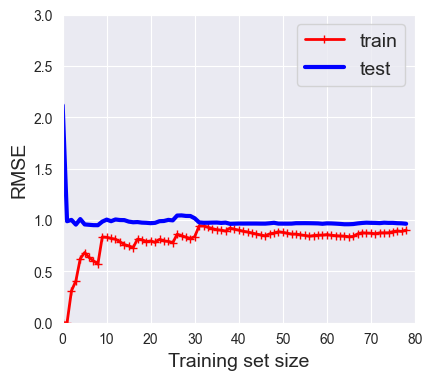

In [3]:
# Discover Learning Curve (test/train error)

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="test")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

lin_reg = LinearRegression()
plt.figure(figsize=(10, 4))
plt.subplot(121)
plot_learning_curves(lin_reg, X, y)
plt.axis((0, 80, 0, 3))
plt.show()

In [ ]:
# This graph mean that current model is underfitting, so we need to add more features or use more complex model

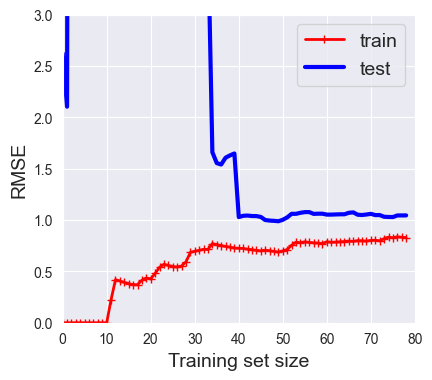

In [6]:
# let's use Polynomial Regression with degree 10

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plt.figure(figsize=(10, 4))
plt.subplot(121)
plot_learning_curves(polynomial_regression, X, y)
plt.axis((0, 80, 0, 3))
plt.show()

In [ ]:
# This graph mean that current model is overfitting, so we need to add more samples to the training set
# Error on training set is much lower than on the validation set
# Between the two models, the linear regression model is better because it has lower RMSE

# One of possible solution to avoid overfitting is continue adding data until the verification error reaches the training error

In [ ]:
# Compromise between Shift and Dispersion

# Shift - part of error that comes from the model's wrong assumptions (model with higher shift is underfitted)
# Dispersion - part of error that comes from the model's sensitivity to small variations in the training data (model with higher dispersion is overfitted)
# Fatal error - model with high shift and high dispersion ( need to clean incoming data or use simpler model)

# Increasing the complexity of the model will typically increase its variance and reduce its bias.
# Conversely, reducing the complexity of the model increases its bias and reduces its variance.
# This is why it is called a tradeoff.

In [ ]:
# Regularized Linear Models

# Best way to decrease overfitting is to regularize the model (constrain it)